In [12]:
import pystac
import rioxarray
import geopandas as gpd

In [2]:
dir = "../Data/01_search.json"
items = pystac.ItemCollection.from_file(dir)
items

## 01 Loading the Raster

In [3]:
## Lazy loader of the raster (saves memory) - data will not be loaded in the memory until needed
raster = rioxarray.open_rasterio(items[1].assets["visual"].href)
print(raster.shape)

(3, 10980, 10980)


In [4]:
raster_overview = rioxarray.open_rasterio(items[1].assets["visual"].href, overview_level = 3)
print(raster_overview.shape)

(3, 687, 687)


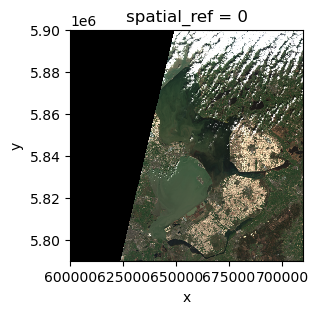

In [8]:
# raster.plot.imshow(figsize=8,8)
raster_overview.plot.imshow(figsize=(3,3))

In [11]:
raster.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

### 02 Clipping with the Vector File

In [13]:
fields = gpd.read_file("../Data/fields_cropped.shp")
fields.head()

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119676.580 500347.036, 119688.039 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120631.197 499818.532, 120595.295 49..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121237.209 499189.398, 121228.989 49..."
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121424.388 499918.068, 121423.197 49..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121418.811 499800.479, 121425.512 49..."


In [14]:
fields.crs

<Projected CRS: PROJCS["Amersfoort_RD_New",GEOGCS["GCS_Amersfoort" ...>
Name: Amersfoort_RD_New
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [15]:
raster.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [24]:
fields = fields.to_crs(raster.rio.crs)
fields.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
fields.total_bounds

array([ 626758.92477826, 5801978.3252512 ,  642583.33625691,
       5817705.26052953])

In [34]:
## Taking help through raster.rio.clip_box?
raster_clip_box = raster.rio.clip_box(*fields.total_bounds)
raster_clip_box.shape

(3, 1574, 1584)

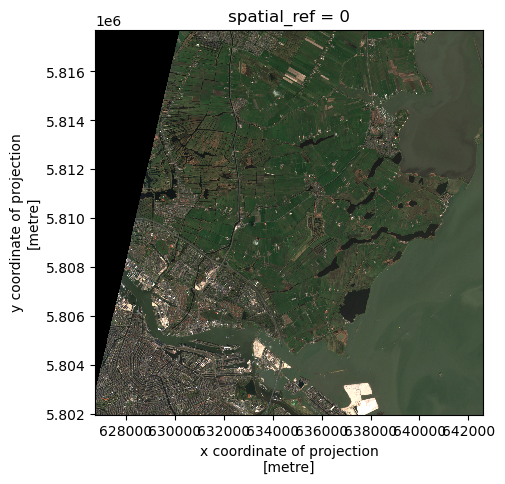

In [32]:
raster_clip_box.plot.imshow(figsize=(5,5))

In [35]:
raster_clip_box.rio.nodata

0

In [36]:
raster_clip_box.rio.to_raster("../Data/04_raster_clip.tif")

### 03 Cropping Raster with Polygon
Clipping rasters based on every polygons present in the GeoDataframe

In [37]:
raster_clip_fields = raster.rio.clip(fields["geometry"])

In [38]:
raster_clip_fields

(3, 1567, 1582)

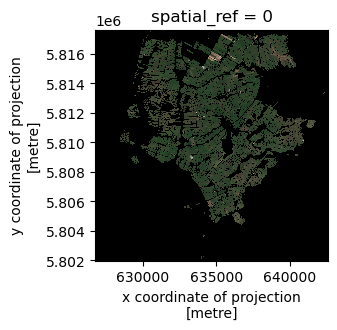

In [41]:
raster_clip_fields.plot.imshow(figsize=(3,3))